In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_excel(r'C:\Users\akshi\Documents\C4_PYTHON\PRACTISE\DS1_C4_S5_Employee_Data_Practice.xlsx')
d

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4
...,...,...,...,...,...,...
65,1074,Female,HR,82500,43,13
66,1075,Male,Sales,53500,28,5
67,1076,Female,HR,57000,29,6
68,1077,Male,Sales,66500,33,7


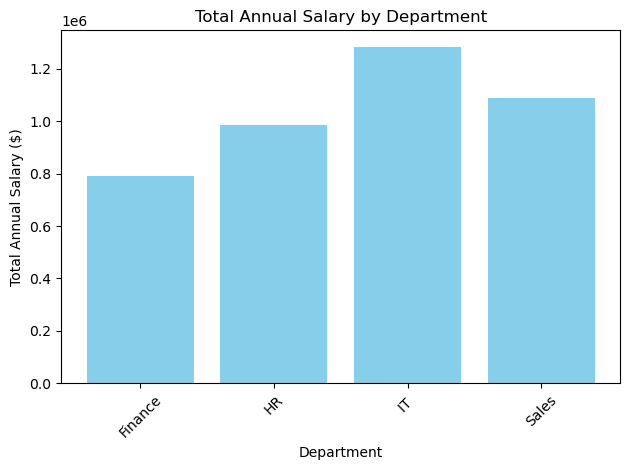

In [3]:
#Task1
# Group by Department and sum Annual Salary
dept_salary_sum = d.groupby("Department")["Annual Salary ($)"].sum()
df = pd.DataFrame(dept_salary_sum).reset_index()
plt.bar(df["Department"], df["Annual Salary ($)"], color="skyblue")
plt.xlabel("Department")
plt.ylabel("Total Annual Salary ($)")
plt.title("Total Annual Salary by Department")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


# It department has highest average salary by department

In [5]:

#task2
dept = d.groupby(by = ["Department","Gender"])["Gender"].count()
df = pd.DataFrame(dept)
df

Gender
Department Gender        
Finance    Female       2
           Male        11
HR         Female      11
           Male         4
IT         Female      10
           Male        12
Sales      Female       4
           Male        16

In [6]:
#tsk3
d["Department"] = d["Department"].str.strip()
d["Work_Experience"] = pd.to_numeric(d["Work_Experience"])
sal = d[(d["Work_Experience"] == 0) & (d["Department"] == "IT")]
avg_sal = sal["Annual Salary ($)"].mean()
print(f"Salary of future new employee is {avg_sal}")

Salary of future new employee is 28100.0


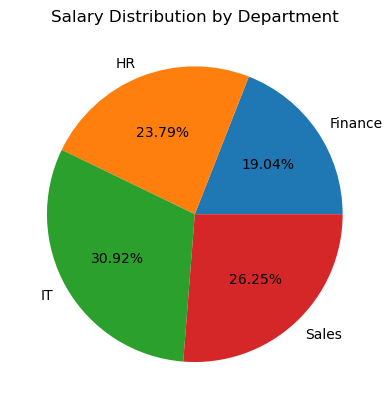

In [7]:
#task4
salary1 = d.groupby(by= ["Department"])["Annual Salary ($)"].sum()
plt.pie(salary1.values, labels = salary1.index , autopct = '%.2f%%')
plt.title("Salary Distribution by Department")
plt.show();

# IT department has the highest salary ratio

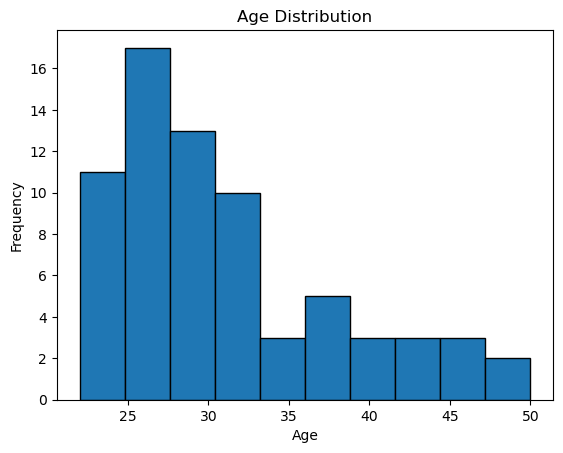

In [9]:
#task5
plt.hist(d["Age"], edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


# 25-30 age progle are more

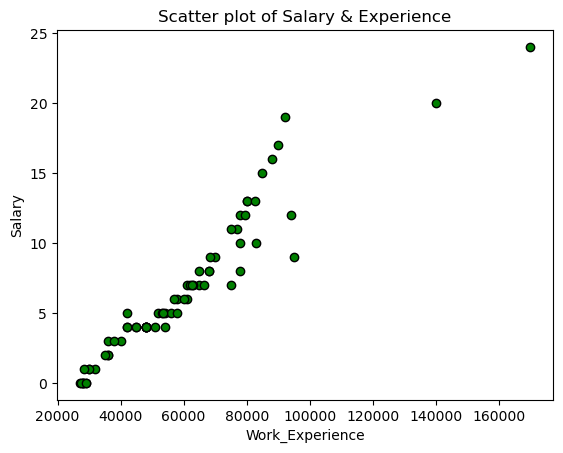

In [51]:
#task6
plt.scatter(d["Annual Salary ($)"],d["Work_Experience"], color = "green",edgecolor = "black")
plt.xlabel("Work_Experience")
plt.ylabel("Salary")
plt.title("Scatter plot of Salary & Experience")
plt.show()

C:\Users\akshi\AppData\Local\Temp\ipykernel_19724\1176246487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Department", y="Annual Salary ($)", data=d, palette="Set2")


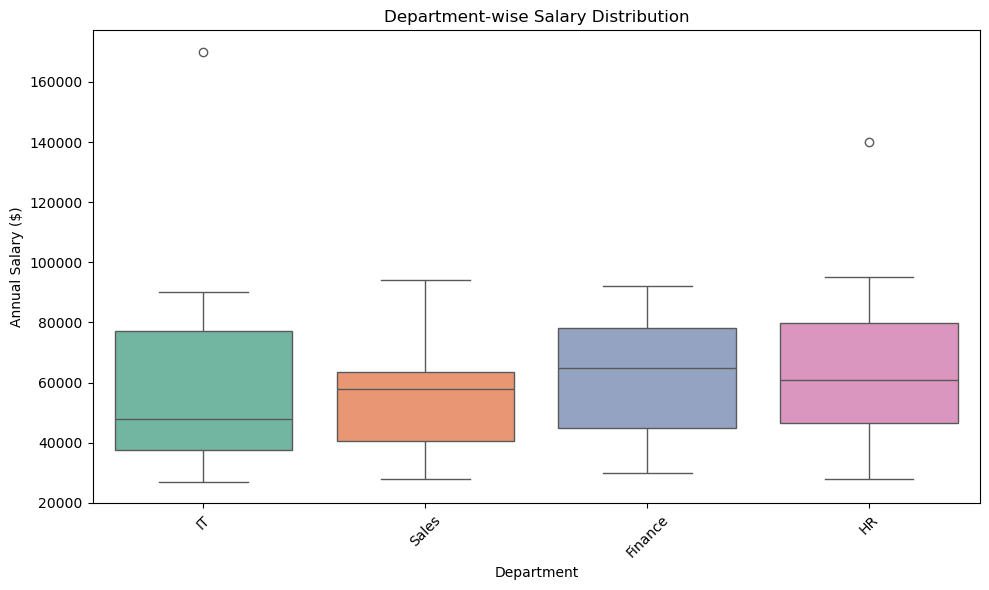

In [14]:
#task7
# boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x="Department", y="Annual Salary ($)", data=d, palette="Set2") # palette means different colours assigning
plt.title("Department-wise Salary Distribution")
plt.xlabel("Department")
plt.ylabel("Annual Salary ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
#task 7 outlier detection
def outlier_analsis(d):
    df1 = d.copy()
    col = df1["Annual Salary ($)"]
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    LF = Q1 - (1.5 * IQR)
    UF = Q3 + (1.5 * IQR)
    df1["Is_Outlier"] = (col < LF) | (col > UF)
    return df1  # You MUST return df1

# now the function cotain the datafame with table and extra column is_outlier and assigning it to the another variable
df_with_outliers = outlier_analsis(d)

# Now you can access it outside the function
print(df_with_outliers[df_with_outliers["Is_Outlier"]])


    Employee_Code   Gender Department  Annual Salary ($)  Age  \
29            1039  Female         HR             140000   49   
64            1073    Male         IT             170000   50   

    Work_Experience  Is_Outlier  
29               20        True  
64               24        True  


# So there are outliers in HR and IT departments